In [ ]:
import ants
import numpy as np
import os

In [2]:
indir = '../../data/ADHD200/Outputs/fmriprep/fmriprep/'

In [3]:
contents = os.listdir(indir)
subs = [content for content in contents if all((content.startswith('sub-') , os.path.isdir(os.path.join(indir,content))))]
subs.sort()

In [4]:
subs[0:10]

['sub-0010001',
 'sub-0010002',
 'sub-0010003',
 'sub-0010004',
 'sub-0010005',
 'sub-0010006',
 'sub-0010007',
 'sub-0010008',
 'sub-0010009',
 'sub-0010010']

In [5]:
subs[10:20]

['sub-0010011',
 'sub-0010012',
 'sub-0010013',
 'sub-0010014',
 'sub-0010015',
 'sub-0010017',
 'sub-0010018',
 'sub-0010019',
 'sub-0010020',
 'sub-0010021']

In [6]:
index = subs.index('sub-0010003')
print(index)

2


In [7]:
lst = list(range(0,5+1))
print(lst)

[0, 1, 2, 3, 4, 5]


../../data/ADHD200/Outputs/fmriprep/fmriprep/sub-0010001/anat/sub-0010001_desc-preproc_T1w.nii.gz
../../data/ADHD200/Outputs/fmriprep/fmriprep/sub-0010001/anat/sub-0010001_desc-brain_mask.nii.gz


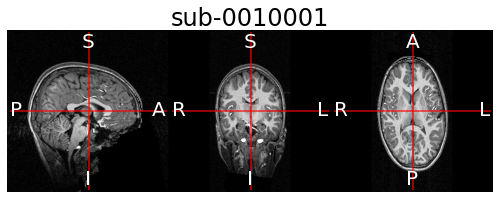

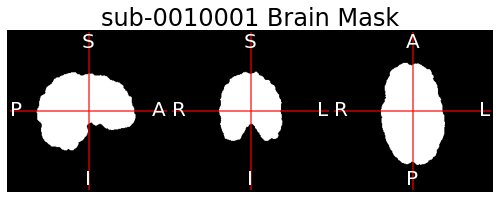

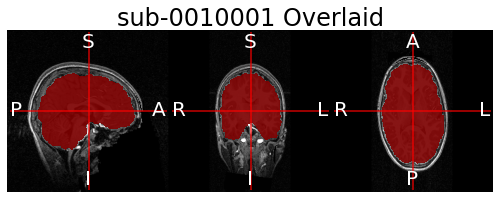

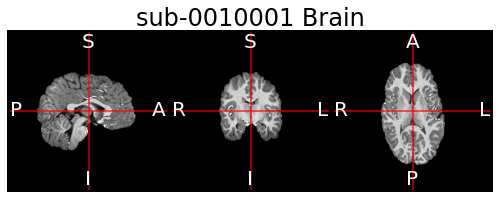

(128, 256, 256)
../../data/ADHD200/Outputs/fmriprep/fmriprep/sub-0010002/anat/sub-0010002_desc-preproc_T1w.nii.gz
../../data/ADHD200/Outputs/fmriprep/fmriprep/sub-0010002/anat/sub-0010002_desc-brain_mask.nii.gz


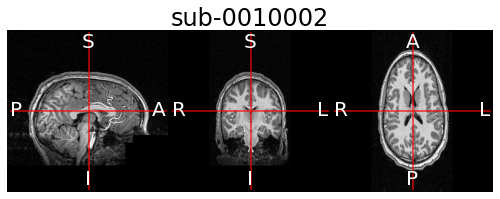

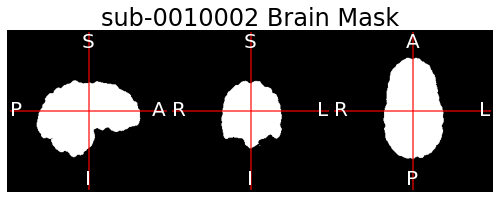

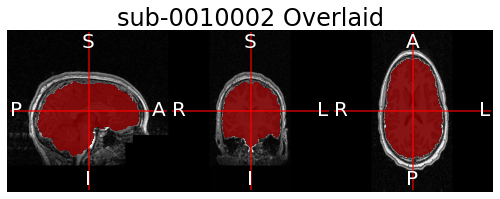

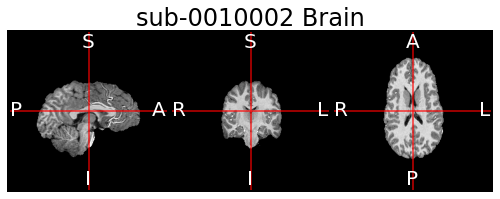

(128, 256, 256)
../../data/ADHD200/Outputs/fmriprep/fmriprep/sub-0010003/anat/sub-0010003_desc-preproc_T1w.nii.gz
../../data/ADHD200/Outputs/fmriprep/fmriprep/sub-0010003/anat/sub-0010003_desc-brain_mask.nii.gz


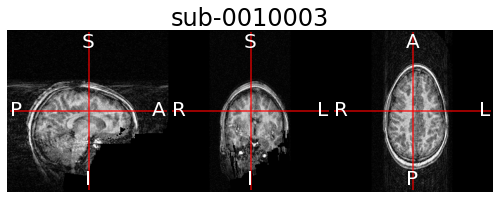

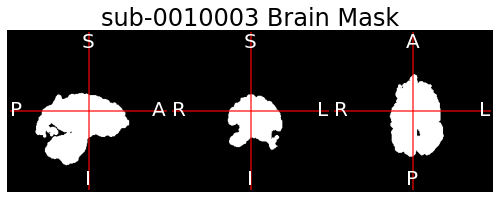

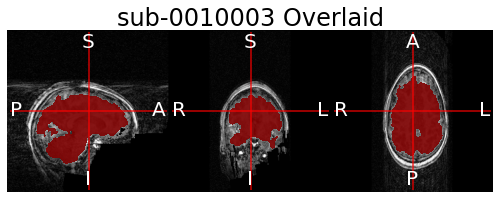

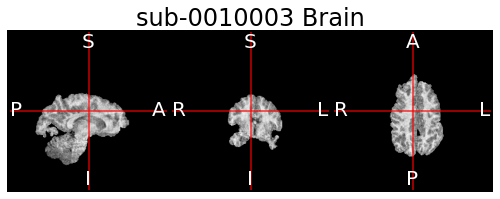

(128, 256, 256)
../../data/ADHD200/Outputs/fmriprep/fmriprep/sub-0010004/anat/sub-0010004_desc-preproc_T1w.nii.gz
../../data/ADHD200/Outputs/fmriprep/fmriprep/sub-0010004/anat/sub-0010004_desc-brain_mask.nii.gz


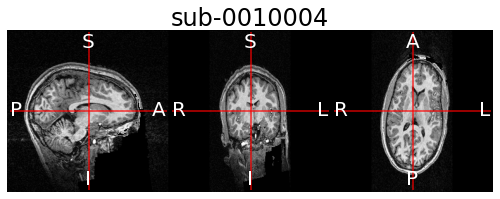

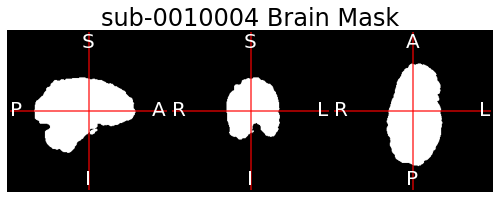

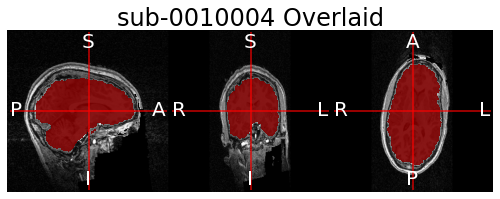

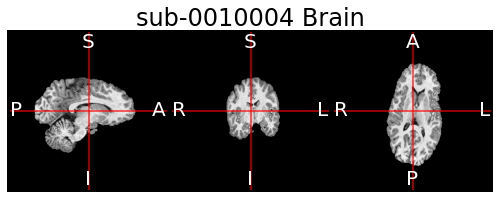

(128, 256, 256)
../../data/ADHD200/Outputs/fmriprep/fmriprep/sub-0010005/anat/sub-0010005_desc-preproc_T1w.nii.gz
../../data/ADHD200/Outputs/fmriprep/fmriprep/sub-0010005/anat/sub-0010005_desc-brain_mask.nii.gz


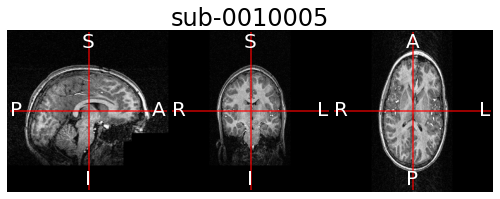

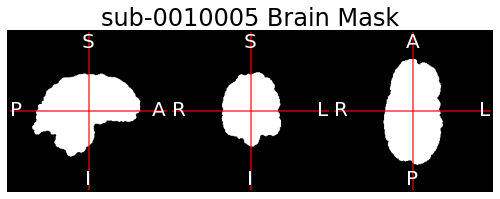

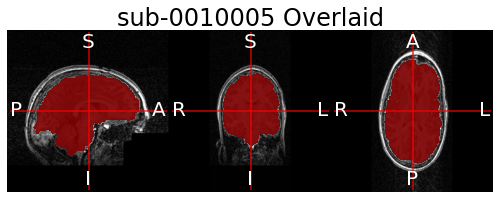

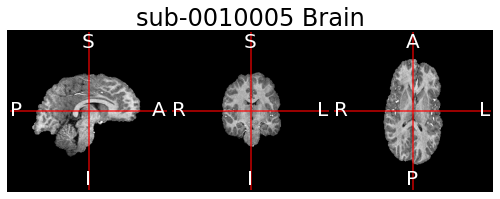

(128, 256, 256)
../../data/ADHD200/Outputs/fmriprep/fmriprep/sub-0010006/anat/sub-0010006_desc-preproc_T1w.nii.gz
../../data/ADHD200/Outputs/fmriprep/fmriprep/sub-0010006/anat/sub-0010006_desc-brain_mask.nii.gz


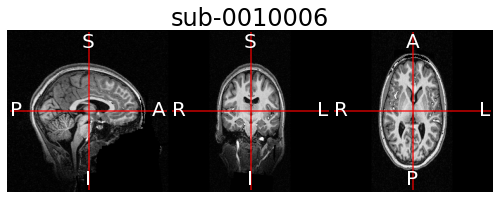

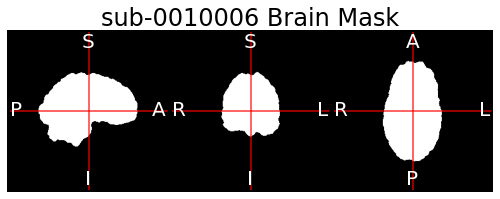

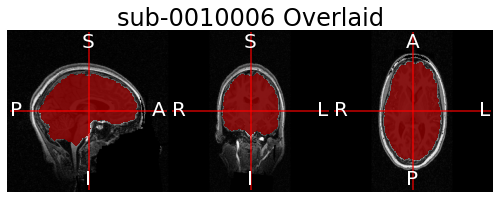

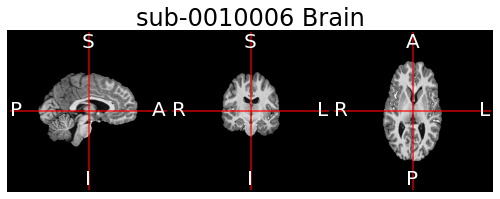

(128, 256, 256)


In [10]:
for s in lst:
    T1_fn_template = '{sub}_desc-preproc_T1w.nii.gz' #formatted string
    brain_mask_template = '{sub}_desc-brain_mask.nii.gz' #formatted string
   
    T1_fn = T1_fn_template.format(sub=subs[s]) # full path to the brain scan
    brain_mask_fn = brain_mask_template.format(sub=subs[s])
    
    T1_path = os.path.join(indir,subs[s],'anat',T1_fn)
    brain_mask_path = os.path.join(indir,subs[s],'anat',brain_mask_fn)
    
    print(T1_path)
    print(brain_mask_path)
    
    T1 = ants.image_read(T1_path) # Read in the image as ants object
    brain_mask = ants.image_read(brain_mask_path)
    T1.plot_ortho(flat=True,title=subs[s])
    brain_mask.plot_ortho(flat=True,title= f'{subs[s]} Brain Mask')
    T1.plot_ortho(brain_mask,flat=True,title=f'{subs[s]} Overlaid')
    
    brain = T1.copy() # Make a copy of the brain scan
    brain[brain_mask<1]=0 # Zero out non-brain stuff
    
    brain.plot_ortho(flat=True,title=f'{subs[s]} Brain')
    
    print(brain.numpy().shape) # Size of the brain in ~boxels~ voxels
    
    brain_resampled = brain.resample_image(resample_params=(64,64,64), use_voxels=True, interp_type=4)
    # Resample the brain into a 64 x 64 x 64 size
    
    # brain_resampled.plot_ortho(flat=True,title=f'{subs[s]} Extracted Brain') 
    
    ofn = f'../../Extracted_Brains/{subs[s]}_Extracted_Brain.nii.gz'
    brain_resampled.to_file(ofn) #save it

In [11]:
type(brain_resampled)

ants.core.ants_image.ANTsImage

In [13]:
brain_resampled.numpy().shape

(64, 64, 64)

In [14]:
# load each extracted brain
# access numpy array
# store in one matrix (number of subs,64,64,64)
# Arr = <something>
# Arr.shape should be (760,64,64,64)
# np.save(file=‘./extracted_brains.npy’, arr=Arr)

In [15]:
pwd

'/mmfs1/data/bergerar/BC-MRI-ADHD/Data'

In [ ]:
# nii.gz # nifty file extention / suffix